# Introduction

> Regression analysis and regression models are frequently used to model the relationships between the attributes and the outcomes.

> Regression analysis estimates the values of output variables by finding a function of the attributes or features that best approximates the output values.

> General concept regression polynomial:
``` Y = a + b1 X1 + b X2 + ... ```

Where: 
- a = intercept at Y-axis 
- bi = coefficient (It represents the amount by which dependent variable changes if we change its independent variable by one unit keeping others independent variables constant).

In general, we can determine which variable most influences the value of the dependent variable by selecting the highest coefficent. But please make sure that its coefficient is statistically significant by looking its p-value.

NOTE: If a coefficient is considered statistically significant, it means that there is strong evidence to suggest that the corresponding independent variable has a non-zero effect on the outcome variable. 

# Exercise

For this exercise, we will be using one of the publicly available datasets from IBM Watson, which can be found at https://www.ibm.com/communities/analytics/watson-analytics-blog/marketing-customer-value-analysis/.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [3]:
df = pd.read_csv('./data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


**Data Analysis**

In [4]:
df['Engaged'] = df['Response'].apply(lambda x: 0 if x == 'No' else 1)

In [6]:
engagement_rate = pd.DataFrame(df.groupby(['Engaged']).count()['Response']
                               / df.shape[0])

engagement_rate.T

Engaged,0,1
Response,0.856799,0.143201


In [9]:
# Sales channels

engagement_by_sales_channel = pd.pivot_table(df, 
                                             values='Response', 
                                             index='Sales Channel', 
                                             columns='Engaged', 
                                             aggfunc=len)\
                                .fillna(0.0)

engagement_by_sales_channel.columns = ['Not Engaged', 'Engaged']
engagement_by_sales_channel

,Not Engaged,Engaged
Sales Channel,,
Agent,2811,666
Branch,2273,294
Call Center,1573,192
Web,1169,156


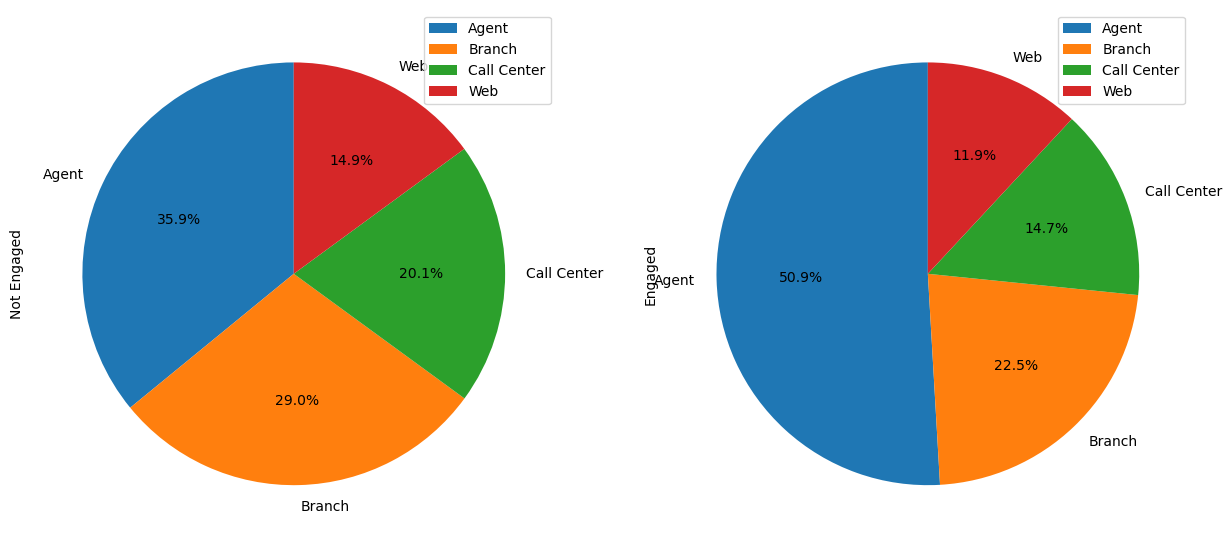

In [12]:
engagement_by_sales_channel.plot(kind='pie',
                                 figsize=(15, 7), 
                                 startangle=90, 
                                 subplots=True, 
                                 autopct=lambda x: '%0.1f%%' % x)

plt.show()

As you can see from these charts, more than half of the engaged customers were from agents, whereas non-engaged customers are more evenly distributed across all four different channels. 

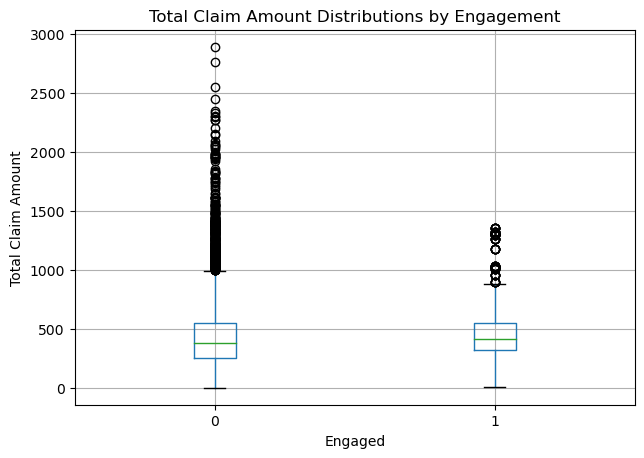

In [13]:
# Total claim amounts

ax = df[['Engaged', 'Total Claim Amount']].boxplot(
    by='Engaged',
    showfliers=True,
    figsize=(7, 5)
)

ax.set_xlabel('Engaged')
ax.set_ylabel('Total Claim Amount')
ax.set_title('Total Claim Amount Distributions by Engagement')

plt.suptitle('')
plt.show()

NOTE:
- The dots above the upper boundary line show the suspected outliers that are decided based on the Interquartile range (IQR). The IQR is simply the range between the first and third quartiles, and the points that fall 1.5*IQR above the third quartile or 1.5*IQR below the first quartile are suspected outliers and are shown with the dots.
- We can remove the outlier by set parameter 'showfliers=False'

**Continuous variables**

In [18]:
# Continuous variable only

continuous_vars = ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 
                   'Months Since Last Claim', 'Months Since Policy Inception',
                   'Number of Open Complaints','Number of Policies', 
                   'Total Claim Amount']

logit = sm.Logit(df['Engaged'], df[continuous_vars])
logit_fit = logit.fit()
logit_fit.summary()

Optimization terminated successfully.
         Current function value: 0.421189
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9126
Method:                           MLE   Df Model:                            7
Date:                Thu, 04 Apr 2024   Pseudo R-squ.:                -0.02546
Time:                        15:07:01   Log-Likelihood:                -3847.1
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.741e-06   5.04e-06     -1.337      0.181   -1.66e-05    3.14e-06
Income                        -2.857e-06   1.03e-06     -2.766      0.006   -4.88e-06   -8.33e-07
Monthly Premium Auto             -0.0084      0.001     -6.889      0.000      -0.011      -0.006
Months Since Last Claim          -0.0202      0.003     -7.238      0.000      -0.026      -0.015
Months Since Policy Inception    -0.0060      0.001     -6.148      0.000      -0.008      -0.004
Number of Open Complaints        -0.0829      0.034     -2.424      0.015      -0.150      -0.016
Number of Policies               -0.0810      0.013     -6.356      0.000      -0.106      -0.056
Total Claim Amount                0.0001      0.000      0.711      0.477      -0.000       0.000
=================================================================================================
"""

NOTE:
- The Income, Monthly Premium Auto, Months Since Last Claim, Months Since Policy Inception, and Number of Policies variables have significant relationship with the output variable, Engaged (P>|z| << 0.5).
- From variable Number of Policies, this suggests that the more policies that the customers have, the less likely they are to respond to marketing calls.
- From varriable Number of Months Since Last Claim, it means that the longer it has been since the last claim, the less likely that the customer is going to respond to marketing calls.

The guidence:

1. P > |z|, make sure that its value is small (commonly less than 0.05).
2. Check the coef, the greater the value, the greater its effect.
3. The + affect increasing in variable Y vice versa. 

Explanation table:

1. **Dep. Variable**: This indicates the dependent variable (response variable) used in the logistic regression analysis.

2. **Model**: This specifies the type of model used. In this case, it's a logistic regression model.

3. **No. Observations**: This tells you the number of observations (samples) used in the analysis.

4. **Df Residuals**: This represents the degrees of freedom of the residuals, which is the difference between the total number of observations and the number of parameters estimated in the model. It's an indicator of the model's flexibility.

5. **Method**: This specifies the method used to estimate the model parameters. In logistic regression, it's typically Maximum Likelihood Estimation (MLE).

6. **Date**: This shows the date and time when the analysis was performed.

7. **Time**: This indicates the time at which the analysis was performed.

8. **converged**: This indicates whether the optimization algorithm converged to a solution. In logistic regression, convergence is important to ensure that the estimated parameters are reliable.

9. **Covariance Type**: This specifies the type of covariance matrix used in estimating standard errors and confidence intervals. In this example, it's non-robust, meaning it assumes homoscedasticity (constant variance) of errors.

10. **Pseudo R-squ.**: This is a pseudo R-squared value, which measures the goodness-of-fit of the model. It's an indicator of how well the model explains the variability in the data. Higher values indicate better fit.

11. **Log-Likelihood**: This is the log-likelihood value of the model. It represents the probability of observing the given data under the estimated model parameters. Higher values indicate a better fit.

12. **LL-Null**: This is the log-likelihood value of a null model (a model with no predictors). It serves as a reference point for comparing the fit of the current model. Lower values of LL-Null indicate better fit.

13. **LLR p-value**: This is the p-value associated with the likelihood ratio test, which compares the fit of the current model to the fit of a null model. A low p-value suggests that the current model significantly improves the fit compared to the null model.

14. **coef**: These are the coefficients estimated for each predictor variable in the model. They represent the change in the log-odds of the dependent variable associated with a one-unit change in the predictor, holding other predictors constant.

15. **std err**: These are the standard errors of the coefficient estimates. They indicate the uncertainty or precision of the estimated coefficients.

16. **z**: These are the z-values, which are the coefficients divided by their standard errors. They are used to test the null hypothesis that the coefficient is equal to zero.

17. **P>|z|**: These are the p-values associated with the z-values. They indicate the significance of each predictor variable. Lower p-values suggest that the predictor is statistically significant.

18. **[0.025 0.975]**: These are the lower and upper bounds of the 95% confidence intervals for the coefficient estimates. They provide a range within which the true population parameter is likely to fall with 95% confidence.

**Categorical variables**

In [20]:
# Unordered categorical
gender_values, gender_labels = df['Gender'].factorize()


# Ordered categorical
categories = pd.Categorical(df['Education'],
                           categories=['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor']
                           )
# or pd.get_dummies(df['Education']) => Encoded


# Add to frame
df['GenderFactorized'] = gender_values
df['EducationFactorized'] = categories.codes


logit = sm.Logit(df['Engaged'], df[['GenderFactorized', 'EducationFactorized']])
logit_fit = logit.fit()
logit_fit.summary()

Optimization terminated successfully.
         Current function value: 0.493068
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9132
Method:                           MLE   Df Model:                            1
Date:                Thu, 04 Apr 2024   Pseudo R-squ.:                 -0.2005
Time:                        15:28:10   Log-Likelihood:                -4503.7
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
GenderFactorized       -1.1266      0.047    -24.116      0.000      -1.218      -1.035
EducationFactorized    -0.6256      0.021    -29.900      0.000      -0.667      -0.585
=======================================================================================
"""

NOTES:
- Both the GenderFactorized and EducationFactorized variables seem to have significant relationship with the output variable Engaged.
- The male customers (encoded with 1) are less likely to be engaged with marketing calls.
- The higher the customers' education levels are, the less likely that they will be engaged with marketing calls.


In [21]:
# Combine it

logit = sm.Logit(df['Engaged'],
                 df[['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
                     'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints',
                     'Number of Policies', 'Total Claim Amount', 'GenderFactorized', 'EducationFactorized'
                    ]])
logit_fit = logit.fit()
logit_fit.summary()

Optimization terminated successfully.
         Current function value: 0.420810
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9124
Method:                           MLE   Df Model:                            9
Date:                Thu, 04 Apr 2024   Pseudo R-squ.:                -0.02454
Time:                        15:41:25   Log-Likelihood:                -3843.7
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.909e-06   5.03e-06     -1.373      0.170   -1.68e-05    2.96e-06
Income                         -2.59e-06   1.04e-06     -2.494      0.013   -4.63e-06   -5.55e-07
Monthly Premium Auto             -0.0081      0.001     -6.526      0.000      -0.011      -0.006
Months Since Last Claim          -0.0194      0.003     -6.858      0.000      -0.025      -0.014
Months Since Policy Inception    -0.0057      0.001     -5.827      0.000      -0.008      -0.004
Number of Open Complaints        -0.0813      0.034     -2.376      0.017      -0.148      -0.014
Number of Policies               -0.0781      0.013     -6.114      0.000      -0.103      -0.053
Total Claim Amount                0.0001      0.000      0.943      0.346      -0.000       0.000
GenderFactorized                 -0.1500      0.058     -2.592      0.010      -0.263      -0.037
EducationFactorized              -0.0070      0.027     -0.264      0.792      -0.059       0.045
=================================================================================================
"""

NOTE:
- The coef value might be change (compared if we combine categorical and numerical fields or not). Because in Least Square Method, we the coef value is determined by others independent variables).
- Since P > |z| determine the significant of the actual coeff model (H0 coef = 0), then its value can be different.
- The Income, Monthly Premium Auto, Months Since Last Claim, Months Since Policy Inception, Number of Open Complaints, Number of Policies, and GenderFactorized variable are significant at a 0.05 significance level, and all of them have negative relationships with the output variable, Engaged.
- The male customers are less likely to engage with marketing calls than female customers, which we can see from looking at the coefficient of GenderFactorized.